# WORLD HAPPİNESS EXPLANATORY DATA ANALYSIS

## What will you learn from this project?
* Bivariate data analysis
* Multivariate data analysis
* Seaborn library visualization techniques: bar, box, kde, swarm, heatmap, clustermap
* Plotly library visualization techniques: animated plot and world map

# Introduction* 
The World Happiness Report is a landmark survey of the state of global happiness
* The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions.
* Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations.
* The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.ess.

## Analysis Content
1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read and Analysis Data](#3)
4. [Data Distributions in 2021](#4)
5. [Happiest and Unhappiest Countries in 2021](#5)
6. [Ladder Score Distribution by Regional Indicator](#6)
7. [Ladder Score Distribution by Countries in Map View](#7)
8. [Most Generous and Most Ungenerous Countries in 2021](#8)
9. [Generous Distribution by Countries in Map View](#9)
10. [Generous Distribution by Regional Indicator in 2021](#10)
11. [Relationship Between Happiness and Income](#11)
12. [Relationship Between Happiness and Freedom](#12)
13. [Relationship Between Happiness and Corruption](#13)
14. [Relationship Between Features](#14)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use('seaborn-v0_8-whitegrid')

import warnings
warnings.filterwarnings("ignore")


/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv
/kaggle/input/world-population-19602018/population_total_long.csv
/kaggle/input/world-population-19602018/pop_worldometer_data.csv
/kaggle/input/world-population-19602018/population_above_age_65_percentage_long.csv
/kaggle/input/world-population-19602018/population_female_percentage_long.csv
/kaggle/input/world-population-19602018/population_below_age_14_percentage_long.csv
/kaggle/input/world-population-19602018/population_density_long.csv


<a id="2"></a><br>
## Data Content
* The happiness scores and rankings use data from the Gallup World Poll.
    * Gallup World Poll: In 2005, Gallup began its World Poll, which continually surveys citizens in 160 countries, representing more than 98% of the world's adult population. The Gallup World Poll consists of more than 100 global questions as well as region-specific items.
* The columns following the happiness score estimate the extent to which each of six factors - economic produciton, social support, life expectancy, freedom, absence of corruption, and generosity - contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world's lowest national averages for each of the six factors.
* **Ladder score:** Happiness score or subjective well-being. This is the national average response to the question of life evaluations.
* **Logged GDP per capita:** The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.
* **Social support:** Social support refers to assistance or support provided by members of social networks to an individual.
* **Healthy life expectancy:** Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
* **Freedom to make life choices:** Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked.
* **Generosity:** Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
* **Perceptions of corruption:** The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”
* **Ladder score in Dystopia:** It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia
* World Happiness Report Official Website: https://worldhappiness.report/

<a id="3"></a><br>
## Read and Anaysis Data

In [2]:
#read data
df = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")

In [3]:
# show first five row of data
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
#describe basic statistics of data
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [5]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


This DataFrame consists of 1949 observations containing various indicators related to happiness and quality of life. Below is a detailed explanation of the DataFrame structure:
* **General Features of the Dataset:**
   * Total Observations: 1949
   * Total Columns: 11
   * Data Types:
       * 1 text (object) column
       * 1 integer (int64) column
       * 9 decimal number (float64) columns
   * Memory Usage: 167.6 KB
* **Columns and Descriptions:**
   * Country name: A text column containing country names. No missing data.
   * year: An integer column indicating the year of the observation. No missing data.
   * Life Ladder: A score representing the happiness levels of countries. No missing data.
   * Log GDP per capita: The logarithm of GDP per capita. Contains 36 missing values.
   * Social support: A score measuring the level of social support people receive. Contains 13 missing values.
   * Healthy life expectancy at birth: The expected healthy life expectancy at birth. Contains 55 missing values.
   * Freedom to make life choices: A score measuring people’s perception of freedom to make life choices. Contains 32 missing values.
   * Generosity: A score measuring people’s level of generosity. Contains 89 missing values.
   * Perceptions of corruption: A score measuring people’s perception of corruption. Contains 110 missing values.
   * Positive affect: A score measuring people’s level of experiencing positive emotions. Contains 22 missing values.
   * Negative affect: A score measuring people’s level of experiencing negative emotions. Contains 16 missing values.
* **Missing Data:**
    * Some columns contain missing values. Notably, the "Perceptions of corruption" and "Generosity" columns have a significant amount of missing data. These missing values should be handled appropriately during data analysis and modeling phases.
* This dataset provides a valuable resource for conducting detailed analyses on happiness levels and quality of life across countries.

In [6]:
#read data
df2021 = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")

In [7]:
#show first five row of data
df2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [8]:
#show first five row of data
df2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [9]:
#information about data
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

This DataFrame provides data on 149 countries, focusing on happiness scores and the contributing factors. Below is a detailed description of the dataset:
* **General Features:**
   * Total Observations: 149
   * Total Columns: 20
   * Data Types:
       * 2 text (object) columns
       * 18 decimal number (float64) columns
   * Memory Usage: 23.4 KB
* **Columns and Descriptions:**
   * Country name: The name of the country. No missing data.
   * Regional indicator: The region to which the country belongs. No missing data.
   * Ladder score: The happiness score of the country. No missing data.
   * Standard error of ladder score: The standard error for the ladder score. No missing data.
   * upperwhisker: The upper bound of the confidence interval for the ladder score. No missing data.
   * lowerwhisker: The lower bound of the confidence interval for the ladder score. No missing data.
   * Logged GDP per capita: The logarithm of GDP per capita. No missing data.
   * Social support: A measure of the perceived social support. No missing data.
   * Healthy life expectancy: The average healthy life expectancy. No missing data.
   * Freedom to make life choices: A score reflecting the freedom to make personal life choices. No missing data.
   * Generosity: A score reflecting the level of generosity in the country. No missing data.
   * Perceptions of corruption: A score reflecting perceptions of corruption in the country. No missing data.
   * Ladder score in Dystopia: The benchmark ladder score for a hypothetical country with the lowest possible values for all factors. No missing data.
   * Explained by: Log GDP per capita: The contribution of GDP per capita to the happiness score. No missing data.
   * Explained by: Social support: The contribution of social support to the happiness score. No missing data.
   * Explained by: Healthy life expectancy: The contribution of healthy life expectancy to the happiness score. No missing data.
   * Explained by: Freedom to make life choices: The contribution of freedom to the happiness score. No missing data.
   * Explained by: Generosity: The contribution of generosity to the happiness score. No missing data.
   * Explained by: Perceptions of corruption: The contribution of corruption perceptions to the happiness score. No missing data.
   * Dystopia + residual: The sum of the Dystopia ladder score and the residual value explaining unexplained factors in the happiness score. No missing data.
* **Key Features:**
   * The dataset is complete with no missing values.
   * It includes detailed breakdowns of how each factor contributes to the happiness score.
   * The presence of Dystopia scores and residuals allows for benchmarking against the worst-case scenario.
* This dataset is well-suited for analyzing global happiness trends and understanding the impact of various socio-economic and environmental factors on well-being.

<a id="4"></a><br>
## Data Distributions in 2021
* Unique Countries
* Count Regional Indicator
* Distribution of Remaining Features

In [10]:
df2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [11]:
# unique countries
df2021["Country name"].unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta',
       'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia',
       'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore',
       'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania',
       'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland',
       'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador',
       'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand',
       'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras',
       'Croatia', 'Philippines', 'South Korea', 'Peru',
       'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan',
       'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro

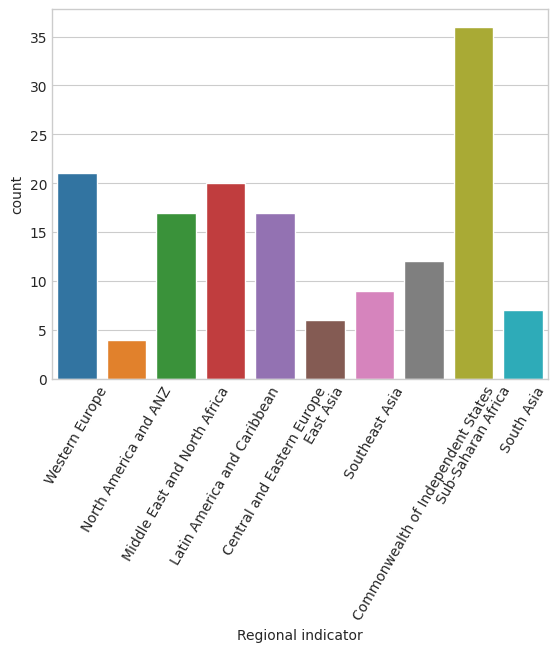

In [12]:
#count regional indicator
sns.countplot(x = df2021["Regional indicator"])
plt.xticks(rotation = 60)
plt.show()

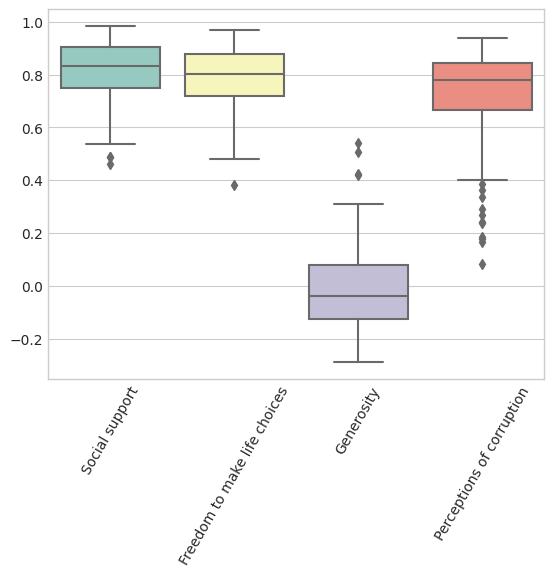

In [13]:
# distribution of feature set 1
list_features = ["Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
sns.boxplot(data = df2021.loc[:, list_features], orient = "v", palette = "Set3")
plt.xticks(rotation = 60)
plt.show()

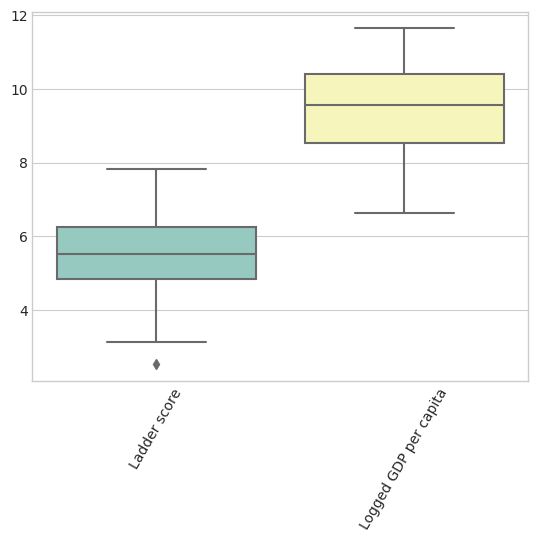

In [14]:
# distribution of features set 2
list_features = ["Ladder score", "Logged GDP per capita"]
sns.boxplot(data = df2021.loc[:, list_features], orient = "v", palette = "Set3")
plt.xticks(rotation = 60)
plt.show()

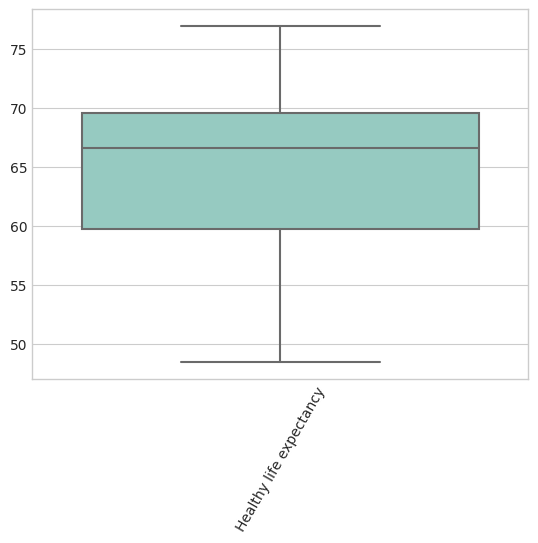

In [15]:
# distribution of features set 3
list_features = ["Healthy life expectancy"]
sns.boxplot(data = df2021.loc[:, list_features], orient = "v", palette = "Set3")
plt.xticks(rotation = 60)
plt.show()

<a id="5"></a><br>
## Happiest and Unhappiest Countries in 2021

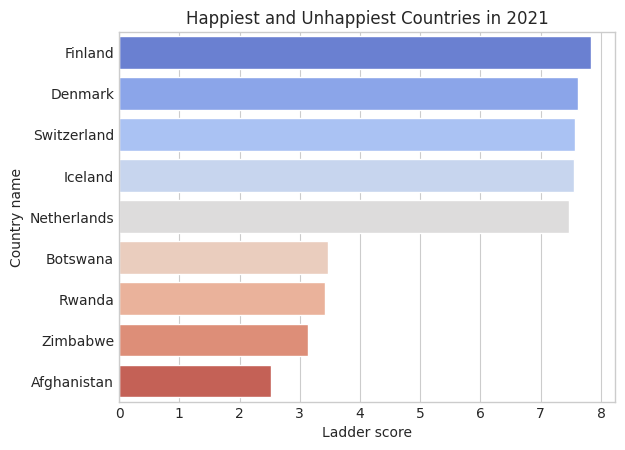

In [16]:
df2021_happiest_unhappiest = df2021[(df2021.loc[:, "Ladder score"] > 7.4) | (df2021.loc[:, "Ladder score"] < 3.5)]
sns.barplot(x = "Ladder score", y = "Country name", data = df2021_happiest_unhappiest, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2021")
plt.show()

<a id="6"></a><br>
## Ladder Score Distribution by Regional Indicator

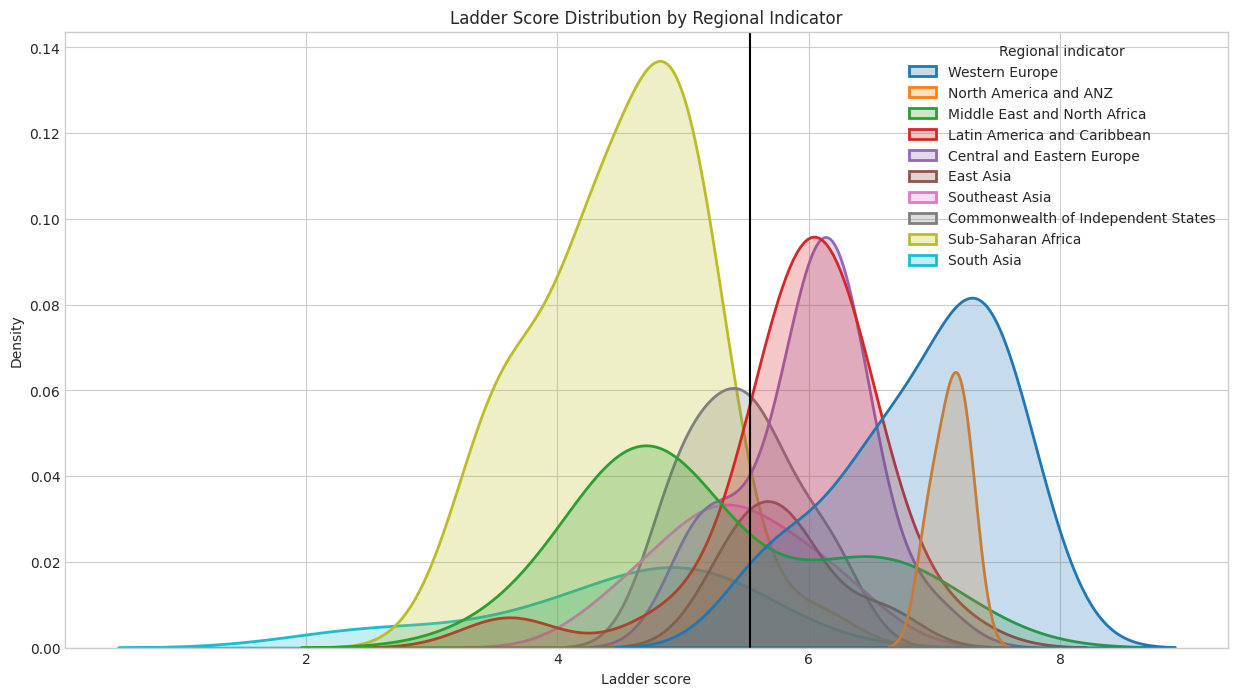

In [17]:
plt.figure(figsize = (15,8))
sns.kdeplot(x = df2021["Ladder score"], hue = df2021["Regional indicator"], fill = True, linewidth = 2)
plt.axvline(df2021["Ladder score"].mean(), c = "black")
plt.title("Ladder Score Distribution by Regional Indicator")
plt.show()

<a id="7"></a><br>
## Ladder Score Distribution by Countries in Map View

In [18]:
fig = px.choropleth(df.sort_values("year"),
                   locations = "Country name",
                   color = "Life Ladder",
                   locationmode = "country names",
                   animation_frame = "year")
fig.update_layout(title = "Life Ladder Comprasion by Countries")
fig.show()

<a id="8"></a><br>
## Most Generous and Most Ungenerous Countries in 2021

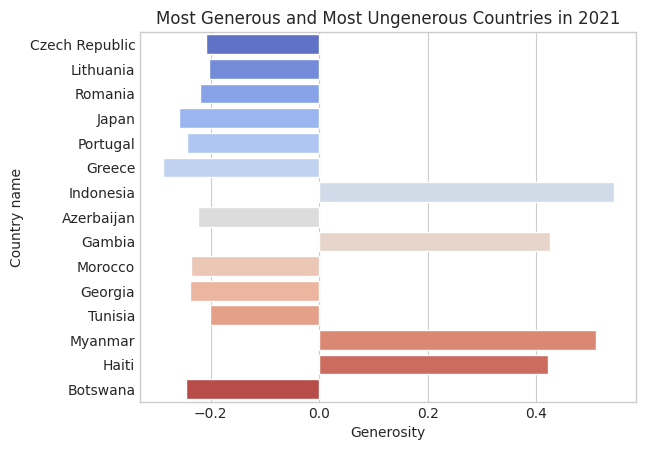

In [19]:
df2021_g = df2021[(df2021.loc[:, "Generosity"] > 0.4) | (df2021.loc[:, "Generosity"] < -0.2)]
sns.barplot(x = "Generosity", y = "Country name", data = df2021_g, palette = "coolwarm")
plt.title("Most Generous and Most Ungenerous Countries in 2021")
plt.show()

<a id="9"></a><br>
## Generous Distribution by Countries in Map View

In [20]:
fig = px.choropleth(df.sort_values("year"),
                   locations = "Country name",
                   color = "Generosity",
                   locationmode = "country names",
                   animation_frame = "year")
fig.update_layout(title = "Generosity Comparision by Countries")
fig.show()

<a id="10"></a><br>
## Generous Distribution by Regional Indicator in 2021

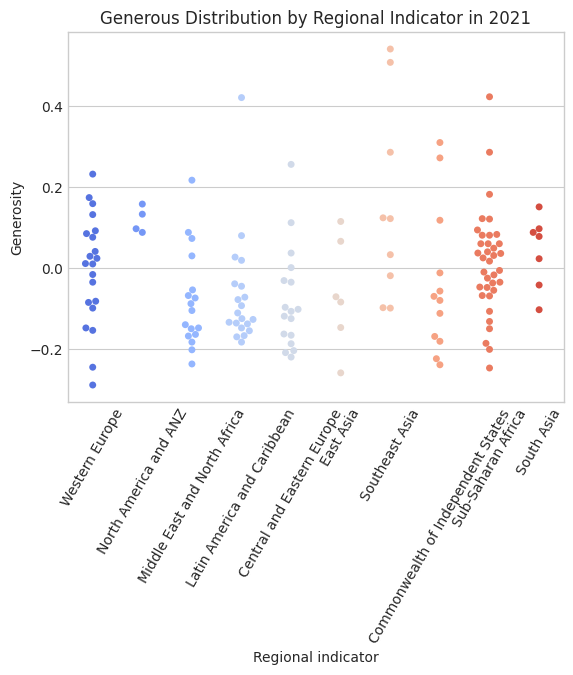

In [21]:
sns.swarmplot(x = "Regional indicator", y = "Generosity", data = df2021, palette = "coolwarm")
plt.xticks(rotation = 60)
plt.title("Generous Distribution by Regional Indicator in 2021")
plt.show()

<a id="11"></a><br>
## Relationship Between Happiness and Income

In [22]:
pop = pd.read_csv("/kaggle/input/world-population-19602018/population_total_long.csv")
pop.head()

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [23]:
country_continent = {}
for i in range(len(df2021)):
    country_continent[df2021["Country name"][i]] = df2021["Regional indicator"][i]
all_countries = df["Country name"].unique().tolist()
all_countries_2021 = df["Country name"].unique().tolist()

for x in all_countries:
    if x not in all_countries_2021:
        print(x)

In [24]:
region = []
for i in range(len(df)):
    if df['Country name'][i] == 'Angola':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Belize':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Congo (Kinshasa)':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Syria':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Trinidad and Tobago':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Cuba':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Qatar':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Sudan':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Central African Republic':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Djibouti':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Somaliland region':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'South Sudan':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Somalia':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Oman':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Bhutan':
        region.append("South Asia")
    elif df['Country name'][i] == 'Suriname':
        region.append("Latin America and Caribbean")
    else:
        region.append(country_continent[df['Country name'][i]])
        
df["region"] = region


In [25]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


In [26]:
all_countries = df["Country name"].unique().tolist()
all_countries_pop = pop["Country Name"].unique().tolist()

del_cou = []
for x in all_countries:
    if x not in all_countries_pop:
        del_cou.append(x)
del_cou

['Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Egypt',
 'Gambia',
 'Hong Kong S.A.R. of China',
 'Iran',
 'Ivory Coast',
 'Kyrgyzstan',
 'Laos',
 'North Cyprus',
 'Palestinian Territories',
 'Russia',
 'Slovakia',
 'Somaliland region',
 'South Korea',
 'Swaziland',
 'Syria',
 'Taiwan Province of China',
 'Venezuela',
 'Yemen']

In [27]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'region'],
      dtype='object')

In [28]:
pop_df = df[["Log GDP per capita", "Life Ladder", "Country name",'year','Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',"region",'Perceptions of corruption']].copy()
pop_df.head()

,Log GDP per capita,Life Ladder,Country name,year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,region,Perceptions of corruption
0,7.370,3.724,Afghanistan,2008,0.451,50.80,0.718,0.168,South Asia,0.882
1,7.540,4.402,Afghanistan,2009,0.552,51.20,0.679,0.190,South Asia,0.850
2,7.647,4.758,Afghanistan,2010,0.539,51.60,0.600,0.121,South Asia,0.707
3,7.620,3.832,Afghanistan,2011,0.521,51.92,0.496,0.162,South Asia,0.731
4,7.705,3.783,Afghanistan,2012,0.521,52.24,0.531,0.236,South Asia,0.776


In [29]:
pop_df = pop_df[~pop_df["Country name"].isin(del_cou)]
pop_df = pop_df[~pop_df.year.isin([2005,2006,2007,2018,2019,2020,2021])]
pop_dict = {x : {} for x in range(2008,2018)}
for i in range(len(pop)):
    if(pop["Year"][i] in range(2008,2018)):
        pop_dict[pop["Year"][i]][pop["Country Name"][i]] = pop["Count"][i]

In [30]:
population = []
for i in pop_df.index:
    population.append(pop_dict[pop_df["year"][i]][pop_df["Country name"][i]])
pop_df["population"] = population

In [31]:
pop_df.head()

,Log GDP per capita,Life Ladder,Country name,year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,region,Perceptions of corruption,population
0,7.370,3.724,Afghanistan,2008,0.451,50.80,0.718,0.168,South Asia,0.882,27722276
1,7.540,4.402,Afghanistan,2009,0.552,51.20,0.679,0.190,South Asia,0.850,28394813
2,7.647,4.758,Afghanistan,2010,0.539,51.60,0.600,0.121,South Asia,0.707,29185507
3,7.620,3.832,Afghanistan,2011,0.521,51.92,0.496,0.162,South Asia,0.731,30117413
4,7.705,3.783,Afghanistan,2012,0.521,52.24,0.531,0.236,South Asia,0.776,31161376


In [32]:
fig = px.scatter(pop_df,
                x = "Log GDP per capita",
                y = "Life Ladder",
                animation_frame = "year",
                animation_group = "Country name",
                size = "population",
                template = "plotly_white",
                color = "region",
                hover_name = "Country name",
                size_max = 60)
fig.update_layout(title = "Life Ladder and Log GDP per capita Comparison by Countries via Regions for each Year")
fig.show()

<a id="12"></a><br>
## Relationship Between Happiness and Freedom

In [33]:
fig = px.scatter(pop_df,
                x = "Freedom to make life choices",
                y = "Life Ladder",
                animation_frame = "year",
                animation_group = "Country name",
                size = "population",
                template = "plotly_dark",
                color = "region",
                hover_name = "Country name",
                size_max = 60)
fig.update_layout(title = "Life Ladder and Freedom to make life choices Comparison by Countries via Regions for each Year")
fig.show()

<a id="13"></a><br>
## Relationship Between Happiness and Corruption

In [34]:
fig = px.scatter(pop_df,
                x = "Perceptions of corruption",
                y = "Life Ladder",
                animation_frame = "year",
                animation_group = "Country name",
                size = "population",
                template = "plotly_dark",
                color = "region",
                hover_name = "Country name",
                size_max = 60)
fig.update_layout(title = "Life Ladder and Perceptions of corruption Comparison by Countries via Regions for each Year")
fig.show()

<a id="14"></a><br>
## Relationship Between Features

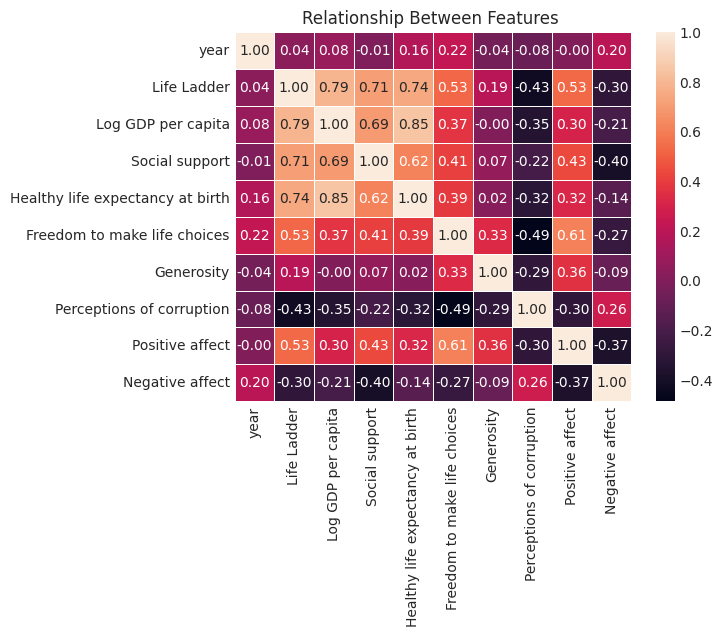

In [35]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True, fmt = ".2f", linewidth = .7)
plt.title("Relationship Between Features ")
plt.show()

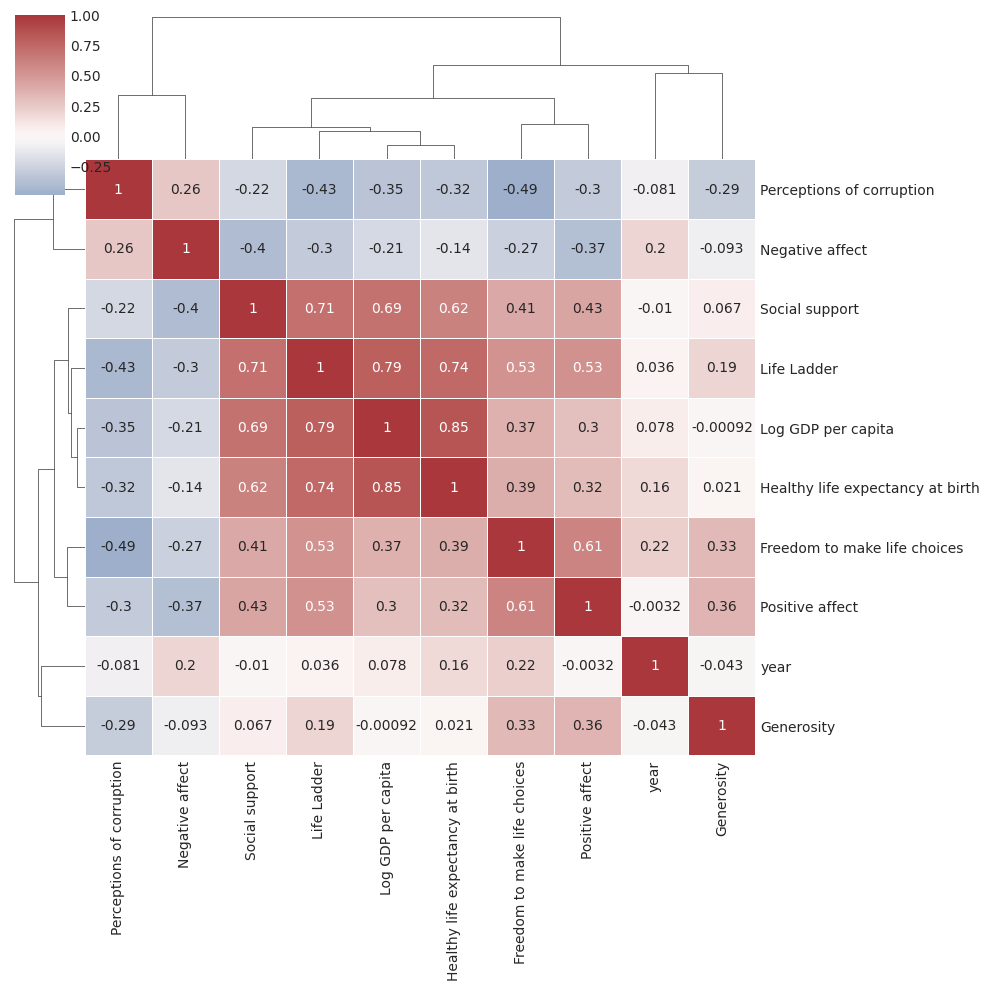

In [36]:
sns.clustermap(df.select_dtypes(include='number').corr(), center = 0, cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .7, figsize=(10,10))
plt.show()